# Logistic Regression

## Load Dataset from sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
df = pd.DataFrame(data=cancer.data,
                  columns=cancer.feature_names)
df['class'] = cancer.target

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [4]:
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

---
## Select features

In [5]:
cols = ["mean radius", "mean texture",
        "mean smoothness", "mean compactness", "mean concave points",
        "worst radius", "worst texture",
        "worst smoothness", "worst compactness", "worst concave points",
        "class"]

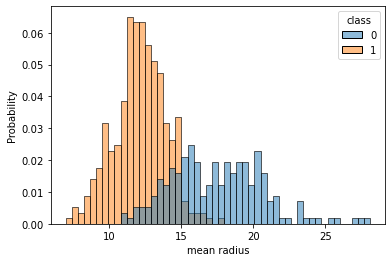

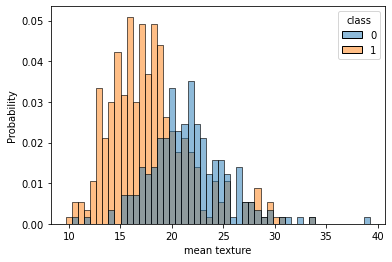

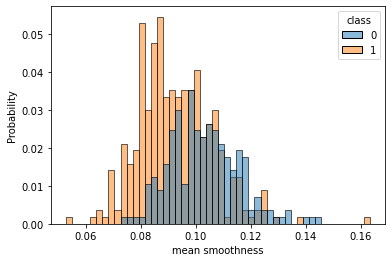

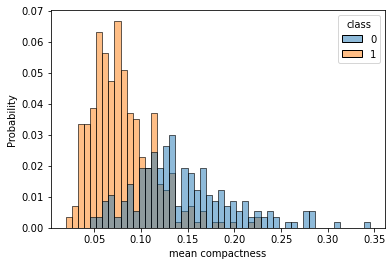

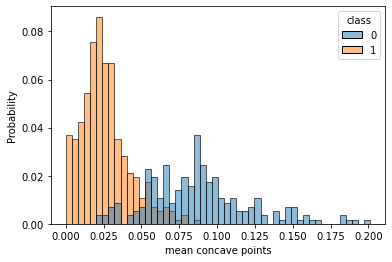

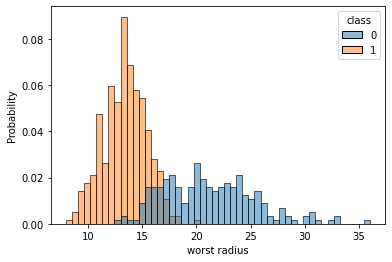

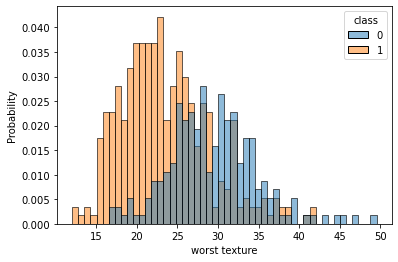

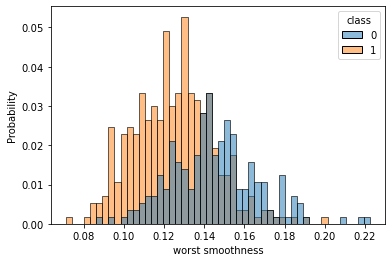

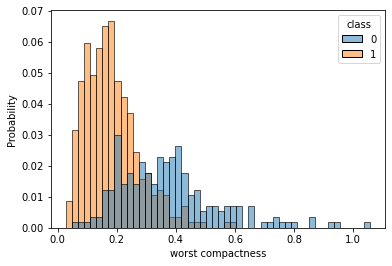

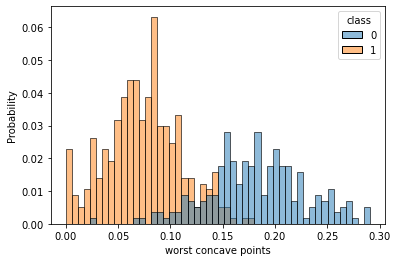

In [6]:
for c in cols[:-1]:
    sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
    plt.show()

---
## Train Model with PyTorch

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
data = torch.from_numpy(df[cols].values).float()

data.shape

torch.Size([569, 11])

In [10]:
data

tensor([[17.9900, 10.3800,  0.1184,  ...,  0.6656,  0.2654,  0.0000],
        [20.5700, 17.7700,  0.0847,  ...,  0.1866,  0.1860,  0.0000],
        [19.6900, 21.2500,  0.1096,  ...,  0.4245,  0.2430,  0.0000],
        ...,
        [16.6000, 28.0800,  0.0846,  ...,  0.3094,  0.1418,  0.0000],
        [20.6000, 29.3300,  0.1178,  ...,  0.8681,  0.2650,  0.0000],
        [ 7.7600, 24.5400,  0.0526,  ...,  0.0644,  0.0000,  1.0000]])

In [11]:
## Split x and y

x = data[:, :-1]
y = data[:, -1:]

print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [12]:
## Define configurations

n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

In [26]:
## Define costum model.

class MyModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        super().__init__()
        
        self.linear = nn.Linear(input_dim, output_dim)
        self.act = nn.Sigmoid()
        
    def forward(self, x):
        # |x| = (batch_size, input_dim)
        y = self.act(self.linear(x))
        # |y| = (batch_size, output_dim)
        
        return y

In [27]:
model = MyModel(input_dim=x.size(-1),
                output_dim=y.size(-1))
crit = nn.BCELoss() ## Binary Classification Loss

optimizer = optim.SGD(model.parameters(),
                      lr=learning_rate)

In [28]:
list(model.parameters())[0][0][0]

tensor(-0.2505, grad_fn=<SelectBackward>)

In [29]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = crit(y_hat, y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if (i + 1) % print_interval == 0:
        print(f"Epoch {i + 1}: loss={loss:.4f}")
        print(f"First parameters: {list(model.parameters())[0][0][0]}")

Epoch 10000: loss=0.2756
First parameters: 1.7622966766357422
Epoch 20000: loss=0.2277
First parameters: 1.6391379833221436
Epoch 30000: loss=0.1990
First parameters: 1.5077060461044312
Epoch 40000: loss=0.1802
First parameters: 1.423635721206665
Epoch 50000: loss=0.1671
First parameters: 1.3719310760498047
Epoch 60000: loss=0.1575
First parameters: 1.3385744094848633
Epoch 70000: loss=0.1500
First parameters: 1.3155708312988281
Epoch 80000: loss=0.1441
First parameters: 1.2985886335372925
Epoch 90000: loss=0.1394
First parameters: 1.2854477167129517
Epoch 100000: loss=0.1354
First parameters: 1.274534821510315
Epoch 110000: loss=0.1321
First parameters: 1.2653623819351196
Epoch 120000: loss=0.1292
First parameters: 1.2575100660324097
Epoch 130000: loss=0.1267
First parameters: 1.2503575086593628
Epoch 140000: loss=0.1246
First parameters: 1.2438198328018188
Epoch 150000: loss=0.1226
First parameters: 1.2378863096237183
Epoch 160000: loss=0.1209
First parameters: 1.232431411743164
Epoc

---
## Result

In [32]:
correct_cnt = (y == (y_hat > .5)).sum()
total_cnt = float(y.size(0))

print(f"Accuracy: {correct_cnt / total_cnt:.4f}")

Accuracy: 0.9666


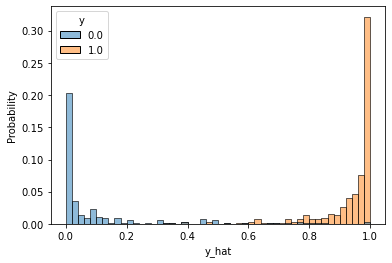

In [34]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                  columns=['y', 'y_hat'])

sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()